Write  a colab  pytorch lightening version of the same



#import the necessary libraries

In [33]:
#import numpy as np
from typing import Callable
import torch
import torch.nn as nn

In [34]:
import torch   # Import PyTorch library

n_samples = 250   # Number of samples
input_dim = 3   # Input dimension

x_true = torch.FloatTensor(n_samples, input_dim).uniform_(-1, 1)   # Generate input data

weights_true = torch.FloatTensor([[4, 2, 3], [1, 1, 3]]).T   # Define weights
bias_true = torch.tensor([0.6, 0.2])   # Define bias

y_true = torch.mm(x_true ** 2, weights_true) + torch.mm(x_true, weights_true) + bias_true   # Generate targets

x_tensor = x_true.clone().detach().requires_grad_(True).float()   # Convert input data to PyTorch tensor
y_true_tensor = y_true.clone().detach().requires_grad_(True).float()   # Convert targets to PyTorch tensor

print(f'x: {x_tensor.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true_tensor.shape}')  


x: torch.Size([250, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([250, 2])


a PyTorch model with two linear layers and two ReLU activation functions,

In [35]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden, ouput_dim):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, ouput_dim)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    r2 = self.relu1(r1)
    l2 = self.linear2(r2)
    return l2
     

In [36]:
loss = nn.MSELoss()

model = TorchModel(3, 20, 2)

y_pred_tensor = model(x_tensor)

loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(17.3333, grad_fn=<MseLossBackward0>)


calculates the mean squared error loss 

In [37]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(17.3333, grad_fn=<MseLossBackward0>)
tensor(11.7052, grad_fn=<MseLossBackward0>)


trains a PyTorch model using stochastic gradient descent optimizer 

In [38]:
def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    if epoch % 1000 == 0:
      print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.05, num_epochs=20000)
y_pred = model(x_tensor)
y_pred = y_pred.cpu().detach().numpy()

tensor(11.7052, grad_fn=<MseLossBackward0>)
tensor(0.0434, grad_fn=<MseLossBackward0>)
tensor(0.0354, grad_fn=<MseLossBackward0>)
tensor(0.0320, grad_fn=<MseLossBackward0>)
tensor(0.0301, grad_fn=<MseLossBackward0>)
tensor(0.0284, grad_fn=<MseLossBackward0>)
tensor(0.0264, grad_fn=<MseLossBackward0>)
tensor(0.0247, grad_fn=<MseLossBackward0>)
tensor(0.0237, grad_fn=<MseLossBackward0>)
tensor(0.0228, grad_fn=<MseLossBackward0>)
tensor(0.0221, grad_fn=<MseLossBackward0>)
tensor(0.0215, grad_fn=<MseLossBackward0>)
tensor(0.0210, grad_fn=<MseLossBackward0>)
tensor(0.0206, grad_fn=<MseLossBackward0>)
tensor(0.0203, grad_fn=<MseLossBackward0>)
tensor(0.0199, grad_fn=<MseLossBackward0>)
tensor(0.0195, grad_fn=<MseLossBackward0>)
tensor(0.0192, grad_fn=<MseLossBackward0>)
tensor(0.0188, grad_fn=<MseLossBackward0>)
tensor(0.0185, grad_fn=<MseLossBackward0>)


In [39]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
#plot() uses t-distributed stochastic neighbor embedding (t-SNE) to reduce the dimensionality of input, target output, and predicted output tensors to one dimension 
def plot(x, y_true, y_pred):
  tsne = TSNE(n_components=1, random_state=0)
  x_2d = tsne.fit_transform(x)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
  plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Distribution plot for y_true and y_pred with X')
  plt.show()
#plot_3d() creates a 3D scatter plot of the input tensor's first two dimensions and the target output tensor
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
  plt.legend()

In [40]:
y_pred_np = y_pred
y_true_np = y_true.detach().numpy()
x_np = x_true.detach().numpy()
     

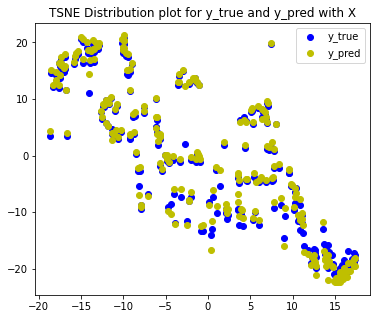

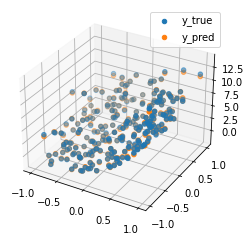

In [41]:
plot(x_np, y_true_np, y_pred_np)
plot_3d(x_np, y_true_np[:, 0], y_pred=y_pred_np[:, 0])